In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk8 import rk_defect_control_perfect_first_step, rk_defect_control_static_alpha_beta, rk_defect_control_perfect_first_step_smooth

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000004, 0.9999999999999996]
beta values [0.5, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 1.0000000000000004]
n_steps 19
n_successful_steps 18

integration complete


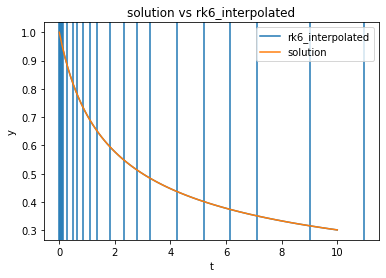

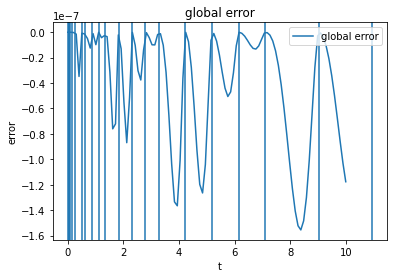

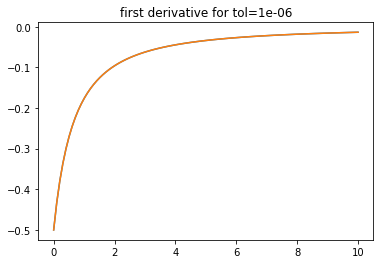

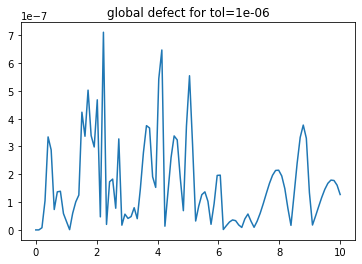

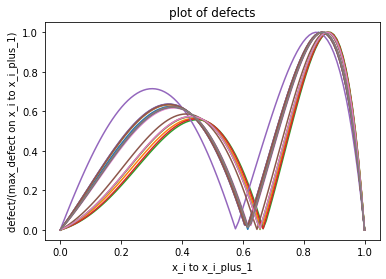

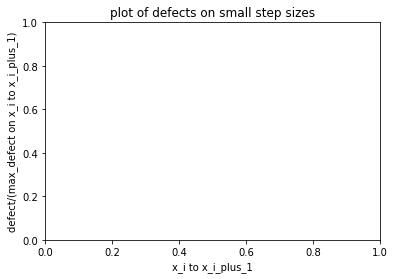

0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.6653345369377348e-15
3.9956926656259384e-13
3.5649261320713777e-13
3.249622793077833e-13
2.8033131371785203e-13
2.412514632510465e-13
7.814859870336477e-13
7.159828285807635e-13
6.054046153280979e-13
5.119793478058909e-13
1.4477308241112041e-12
1.2740919430598296e-12
1.0551559626037488e-12
8.804623696789804e-13
1.883271316671653e-12
1.6074919173547642e-12


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.49999999999999956, 0.9999999999999981, 0.5000000000000004]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982]
n_steps 28
n_successful_steps 25

integration complete


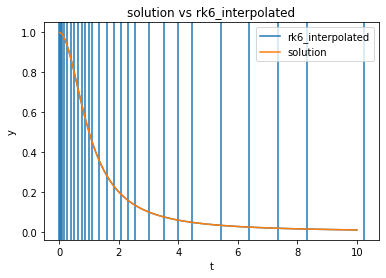

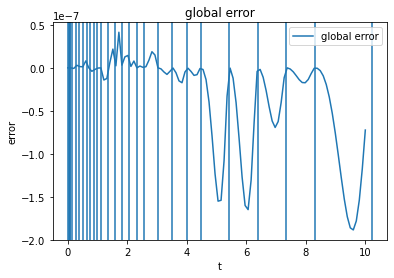

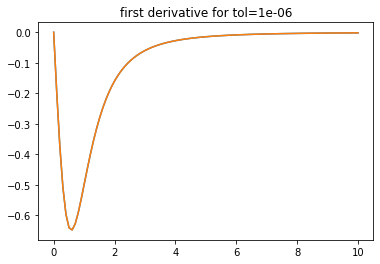

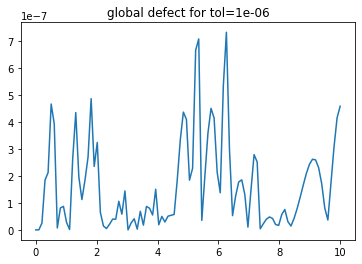

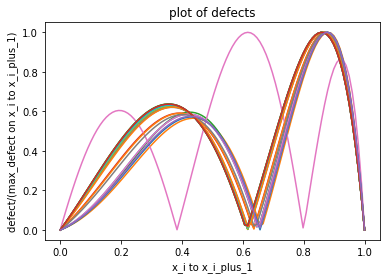

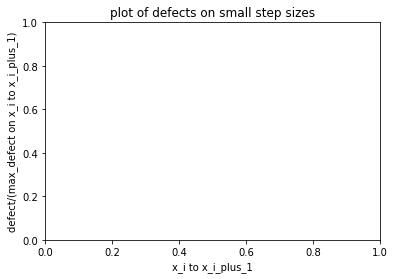

0.0
0.0
0.0
1.1102230246251565e-16
4.440892098500626e-16
1.3844481117075702e-13
1.8196555373606316e-13
1.4277468096679513e-13
7.216449660063518e-14
6.106226635438361e-15
3.907985046680551e-14
6.23945339839338e-14
7.05546732149287e-14
1.0804468431047098e-11
1.0820511153752932e-11
8.534617457200966e-12
6.30345775576302e-12
4.58691418181445e-12
3.352790267641126e-12
3.813749316350368e-11
2.8745866798018938e-11
1.9218612812288427e-11
1.2858963893691566e-11
1.3889659561394652e-10
8.72435422516471e-11
5.24111622157708e-11
3.27142046091522e-11
1.3672146401133567e-10


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000001, 1.0000000000000002, 2.0, 0.5000000000000002]
beta values [0.9999999999999999, 1.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.5, 1.9999999999999991, 1.0000000000000004, 0.5000000000000007]
n_steps 15
n_successful_steps 12

integration complete


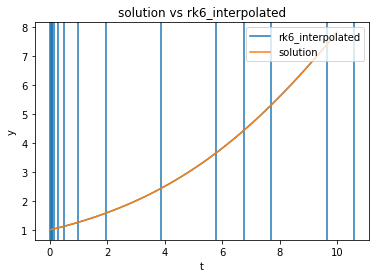

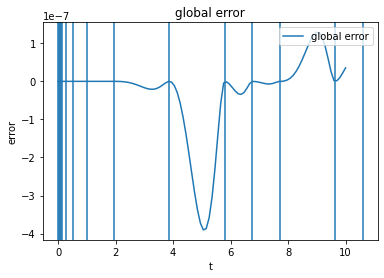

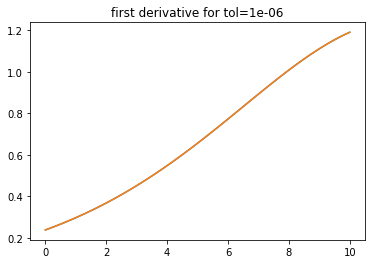

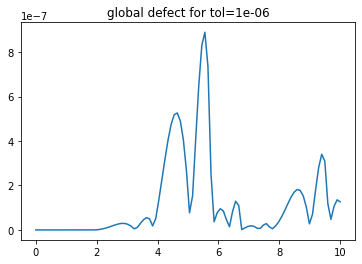

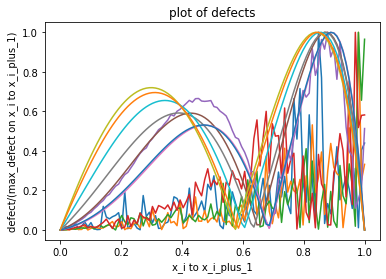

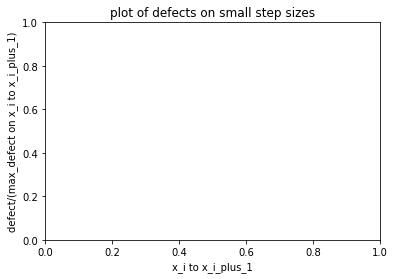

0.0
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
9.259260025373806e-14
3.594768926973302e-11
6.611466929484777e-11
7.628653264646346e-11
8.626344083495496e-11
4.008970933000455e-11
4.197708847186732e-11


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.5000000000000004, 0.9999999999999991, 1.0000000000000073, 0.9999999999999852, 0.5000000000000074, 1.9999999999999705, 1.0000000000000295, 0.4999999999999852, 2.000000000000059, 0.5000000000000296, 15.999999999999986, 1.9999999999998817, 0.9999999999999408]
beta values [0.5, 1.0, 0.06250000000000006, 0.2500000000000002, 0.1250000000000001, 2.0, 1.9999999999999982, 2.000000000000001, 1.0000000000000009, 0.9999999999999926, 1.0000000000000149, 2.000000000000059, 0.5000000000000074, 0.9999999999999704, 1.9999999999999705, 1.0000000000000593, 1.9999999999998817, 0.4999999999999852, 0.5000000000000296]
n_steps 944
n_successful_steps 663

integration complete


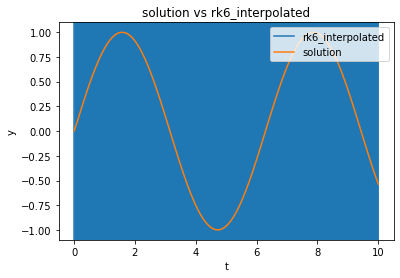

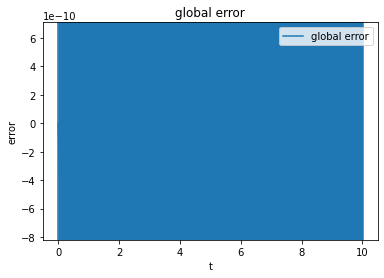

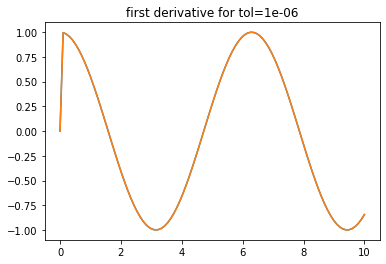

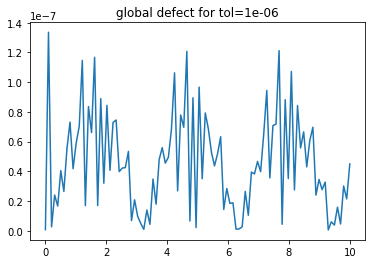

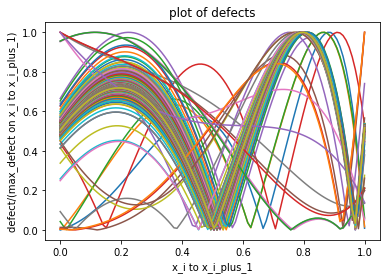

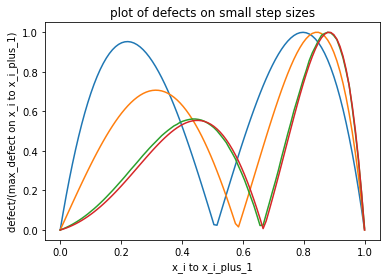

0.0
0.0
0.0
0.0
0.0
9.020562075079397e-17
2.2565282975506307e-14
1.3884227101357283e-11
3.788983016228542e-11
5.3670790034487936e-11
6.526980345089584e-11
7.540321145249607e-11
8.507836102289446e-11
9.461056937887236e-11
1.0408793271743377e-10
1.1353315509943229e-10
1.2295095497272257e-10
1.323404164033093e-10
1.4169884710035774e-10
1.5102652461962407e-10
1.6031997951415633e-10
1.695768525600272e-10
1.7879664415687557e-10
1.879756905687202e-10
1.9711193788296555e-10
2.0620422036543573e-10
2.152503175700815e-10
2.2424734291703885e-10
2.331946857836442e-10
2.420889599896725e-10
2.5092933286785524e-10
2.5971302886063086e-10
2.6843804956655504e-10
2.77103007206847e-10
2.857050152016427e-10
2.9424440661784956e-10
3.0271585238494936e-10
3.1111979659215194e-10
3.1945324163729083e-10
3.2771496627503893e-10
3.359033051708593e-10
3.440160378787027e-10
3.5205105497482236e-10
3.6000658010237885e-10
3.678825022390697e-10
3.756751576489137e-10
3.8338254793046644e-10
3.910048951283329e-10
3.985386465

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.9999999999999991, 1.0, 2.0, 2.0000000000000147, 0.5, 0.4999999999999963, 1.0000000000000073, 1.9999999999999705, 0.5000000000000074, 2.000000000000059, 4.0000000000000595, 0.5000000000000296, 3.9999999999998814, 3.9999999999997633, 0.4999999999999852, 1.9999999999998817, 0.9999999999999852]
beta values [0.5, 1.0, 2.0, 1.0000000000000009, 1.9999999999999962, 0.4999999999999963, 2.0000000000000147, 1.9999999999999927, 0.9999999999999926, 0.5000000000000074, 1.9999999999999705, 2.000000000000059, 0.2500000000000074, 0.2500000000000148, 1.0000000000000149, 1.9999999999998817, 1.0000000000000593, 0.2499999999999963, 0.4999999999999852, 0.5000000000000296]
n_steps 737
n_successful_steps 572

integration complete


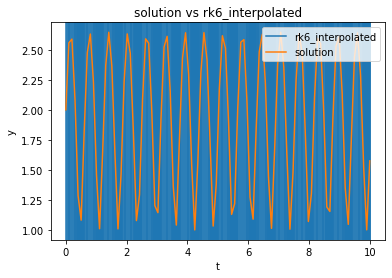

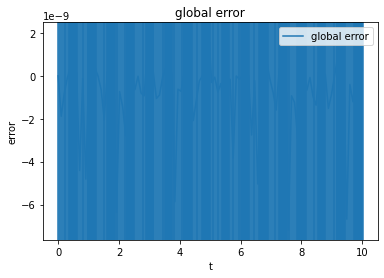

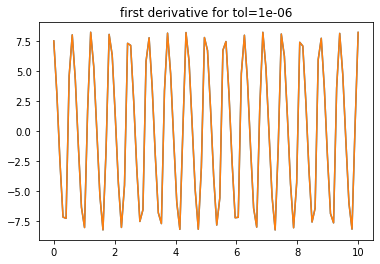

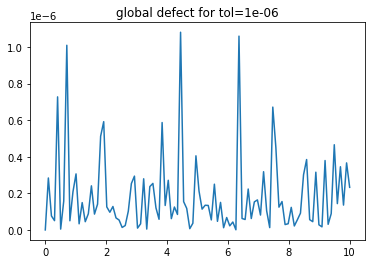

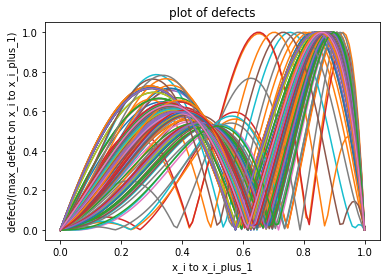

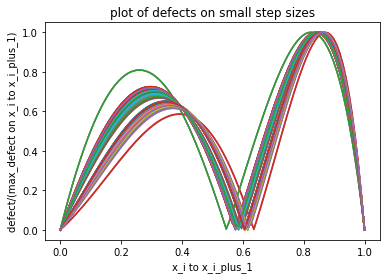

0.0
0.0
0.0
1.7763568394002505e-15
1.7763568394002505e-15
8.881784197001252e-16
8.881784197001252e-16
4.440892098500626e-16
4.440892098500626e-16
8.881784197001252e-16
2.220446049250313e-15
2.6645352591003757e-15
8.992806499463768e-14
9.725553695716371e-14
1.0591527654923993e-13
1.156852391659413e-13
1.2234657731369225e-13
1.2789769243681803e-13
1.2922996006636822e-13
1.3367085216486885e-13
1.3788969965844444e-13
1.41886502547095e-13
3.856914787547794e-13
3.872457909892546e-13
3.8480330033507926e-13
3.785860513971784e-13
3.703704010149522e-13
3.7259084706420253e-13
3.5926817076870066e-13
3.459454944731988e-13
3.299582829185965e-13
3.055333763768431e-13
2.928768338961163e-13
2.702282841937631e-13
2.511324481702104e-13
2.34035013590983e-13
2.204902926905561e-13
2.184918912462308e-13
2.0872192862952943e-13
1.9984014443252818e-13
1.9273471707492718e-13
1.8962609260597674e-13
1.9051427102567686e-13
1.9539925233402755e-13
2.0294876890147862e-13
2.1538326677728037e-13
2.349231920106831e-13
2.

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 1.0000000000000002, 0.5000000000000002, 0.9999999999999996]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.5, 1.9999999999999991, 1.0000000000000004]
n_steps 23
n_successful_steps 21

integration complete


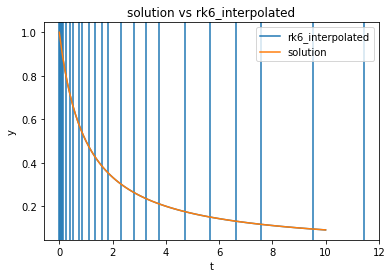

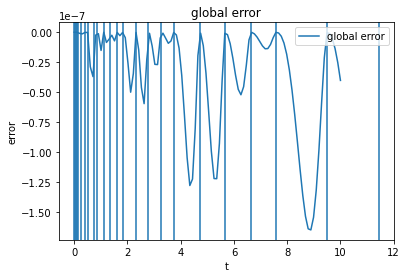

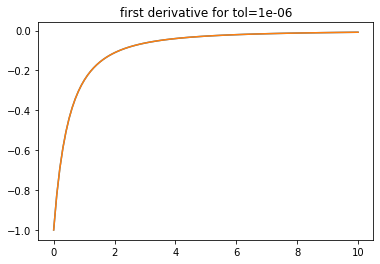

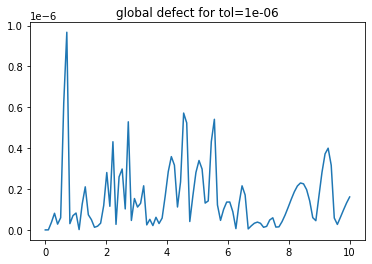

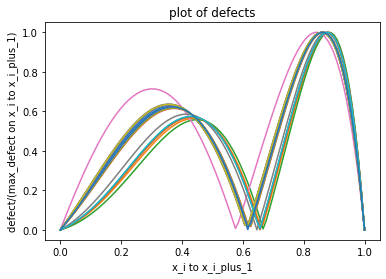

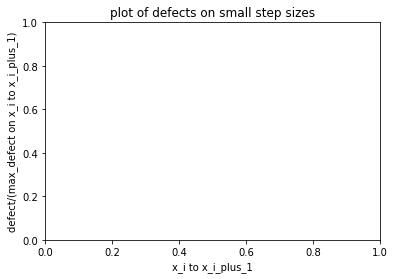

0.0
0.0
0.0
0.0
2.220446049250313e-16
1.1102230246251565e-16
3.3306690738754696e-16
3.3306690738754696e-16
6.661338147750939e-16
6.661338147750939e-16
8.881784197001252e-16
7.771561172376096e-16
7.771561172376096e-16
7.216449660063518e-16
7.216449660063518e-16
5.551115123125783e-16
5.273559366969494e-16
5.551115123125783e-16
4.440892098500626e-16
4.718447854656915e-16
4.440892098500626e-16
4.3021142204224816e-16
4.3021142204224816e-16
4.0245584642661925e-16


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000004, 0.9999999999999996, 0.9999999999999991]
beta values [0.9999999999999996, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.0000000000000004, 1.0000000000000009, 1.9999999999999982, 1.9999999999999962]
n_steps 29
n_successful_steps 24

integration complete


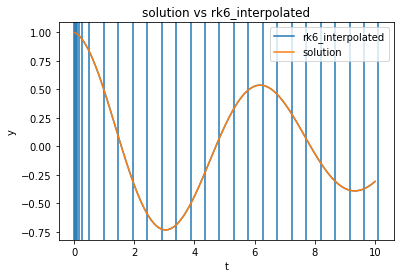

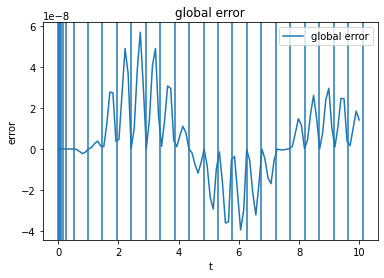

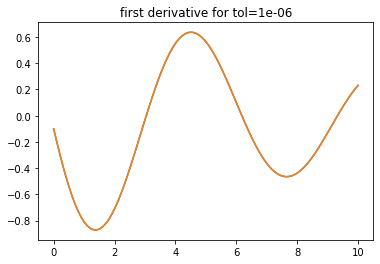

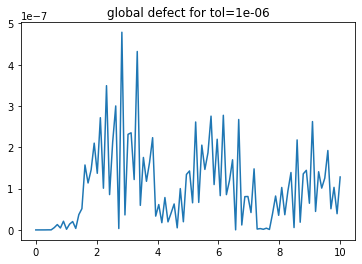

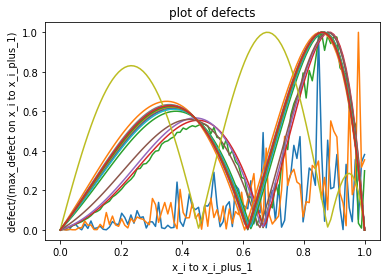

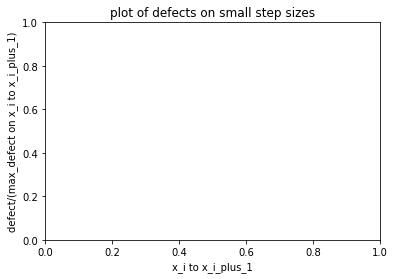

0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
2.220446049250313e-16
2.8754776337791554e-14
5.277722703311838e-14
6.750155989720952e-14
7.027711745877241e-14
6.195044477408373e-14
4.5075054799781356e-14
2.3092638912203256e-14
1.5543122344752192e-15
1.532107773982716e-14
2.3647750424515834e-14
2.2870594307278225e-14
1.3877787807814457e-14
2.220446049250313e-16
1.6153745008296028e-14
2.9531932455029164e-14
3.84969833788773e-14
4.1799896877137144e-14
3.8691272408186705e-14
3.042011087472929e-14
1.9095836023552692e-14


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0000000000000018, 0.4999999999999999, 0.5000000000000001, 0.9999999999999981, 0.5000000000000004, 1.0000000000000009]
beta values [0.49999999999999956, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.0000000000000018, 1.9999999999999982, 0.9999999999999991]
n_steps 23
n_successful_steps 21

integration complete


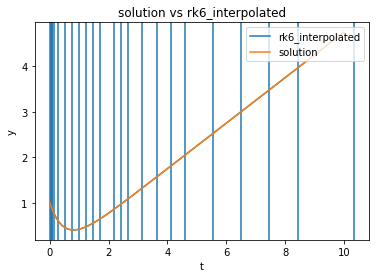

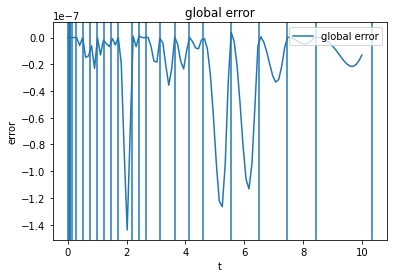

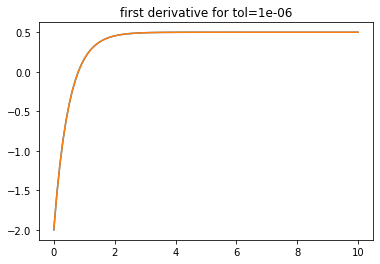

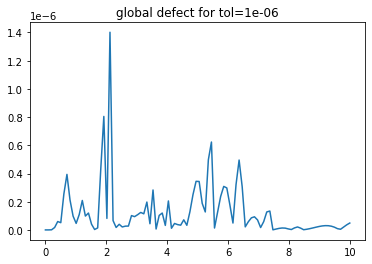

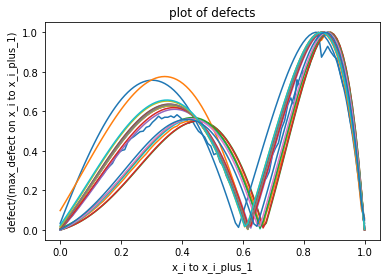

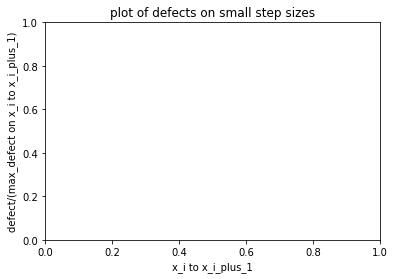

0.0
0.0
0.0
1.1102230246251565e-16
4.440892098500626e-16
1.9773072068574038e-13
7.748574004651232e-11
9.581746507336675e-11
8.891143377098842e-11
7.334582940998757e-11
5.67261793094076e-11
4.21193080413218e-11
2.220600370250736e-09
1.3757318617635406e-09
8.523075578636963e-10
6.495319837540592e-10
3.724434094465323e-10
1.8998291828609126e-10
9.087752772529711e-11
3.991353914045703e-09
1.1684755385488188e-09
2.5682789228653746e-10
5.0188297961994977e-11
1.3860743663940411e-09


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)